Refactor as described as the one below
https://towardsdatascience.com/jupyter-notebook-best-practices-f430a6ba8c69

# Setting up period for structure
We need to set period of the structure, in this case this is centimeters

In [1]:
period = 5.36 #cm

# Setting up magnetic parameter
It is directly impacting Mu(x) and k(x) values and properties of out material

In [2]:
# Magnetic field
B0 = 0.16

# Getting paratameters for YIG material
We are mostly interested in MEEP frequency and MEEP sigma frequency

In [3]:
import numpy as np

# Constants - using precise values
g = 2
c = 3 * 10**8
h = 6.626 * 10**-34
hbar = h / (2 * np.pi)
e = 1.6 * 10**-19
me = 9.1 * 10**-31

# Material properties
Ms = 200.5 * 10**3
ms = 0.178

# Calculate magneton Bora
mu_b = (e * hbar) / (2 * me)

# Calculate gyromagnetic relations
gamma = (g * mu_b) / hbar
gamma_hz = gamma / (2 * np.pi)

# Calculate precession frequencies
omega_pr = gamma * B0
nu_pr = omega_pr / (2 * np.pi)

# Calculate wavelength
lambda_pr = c / nu_pr

# Calculate MEEP frequency
f = 1 / (lambda_pr * 100)

# MEEP parameters
alpha = 0.0001
a = 0.001

# Calculate MEEP gamma
gamma_n = (g * mu_b) / (2 * np.pi * hbar)

# Calculate sigma
sigma = (gamma * ms) / (2 * np.pi)
lambda_sigma = c / sigma
f_sigma = 1 / (lambda_sigma * 100)

# Calculate permeability without losses for specific frequency
x = 4.28 * 10**9 * 2 * np.pi  # This is our ω
omega_s = gamma * ms           # This is ωs = γ·Ms

# Calculate denominator once for both calculations
denominator = (omega_pr**2 - x**2)

# Calculate mu(x) and k(x)
mu_x_before_addition = (omega_pr * omega_s) / denominator
mu_x = 1 + mu_x_before_addition
k_x = (x * omega_s) / denominator

# Print all results
print(f"Magnetic Induction (Tesla): {B0:.2f}")
print(f"Magneton Bora: {mu_b:.3e}")
print(f"Gyromagnetic Relation (rad/Hz/T): {gamma:.3e}")
print(f"Gyromagnetic Relation (Hz/T): {gamma_hz:.3e}")
print(f"Precession Frequency (rad/s): {omega_pr:.3e}")
print(f"Precession Frequency (Hz): {nu_pr:.3e}")
print(f"Wavelength (m): {lambda_pr:.3f}")
print(f"MEEP Frequency (cm): {f:.3f}")  # use in scripts when integrated, multiplicate by structure period
print(f"MEEP Gamma: {gamma_n:.3e}")
print(f"Sigma: {sigma:.3e}")
print(f"Lambda Sigma (m): {lambda_sigma:.3f}")
print(f"MEEP Sigma Frequency (cm): {f_sigma:.3f}")  # use in scripts when integrated, multiplicate by structure period
print(f"denominator: {denominator:.3e}")
print(f"mu_x_before_addition: {mu_x_before_addition:.3f}")
print(f"Mu(x): {mu_x:.3f}")
print(f"k(x): {k_x:.3f}")


Magnetic Induction (Tesla): 0.16
Magneton Bora: 9.271e-24
Gyromagnetic Relation (rad/Hz/T): 1.758e+11
Gyromagnetic Relation (Hz/T): 2.798e+10
Precession Frequency (rad/s): 2.813e+10
Precession Frequency (Hz): 4.477e+09
Wavelength (m): 0.067
MEEP Frequency (cm): 0.149
MEEP Gamma: 2.798e+10
Sigma: 4.981e+09
Lambda Sigma (m): 0.060
MEEP Sigma Frequency (cm): 0.166
denominator: 6.822e+19
mu_x_before_addition: 12.906
Mu(x): 13.906
k(x): 12.337


# Creating plot to consult and adjust

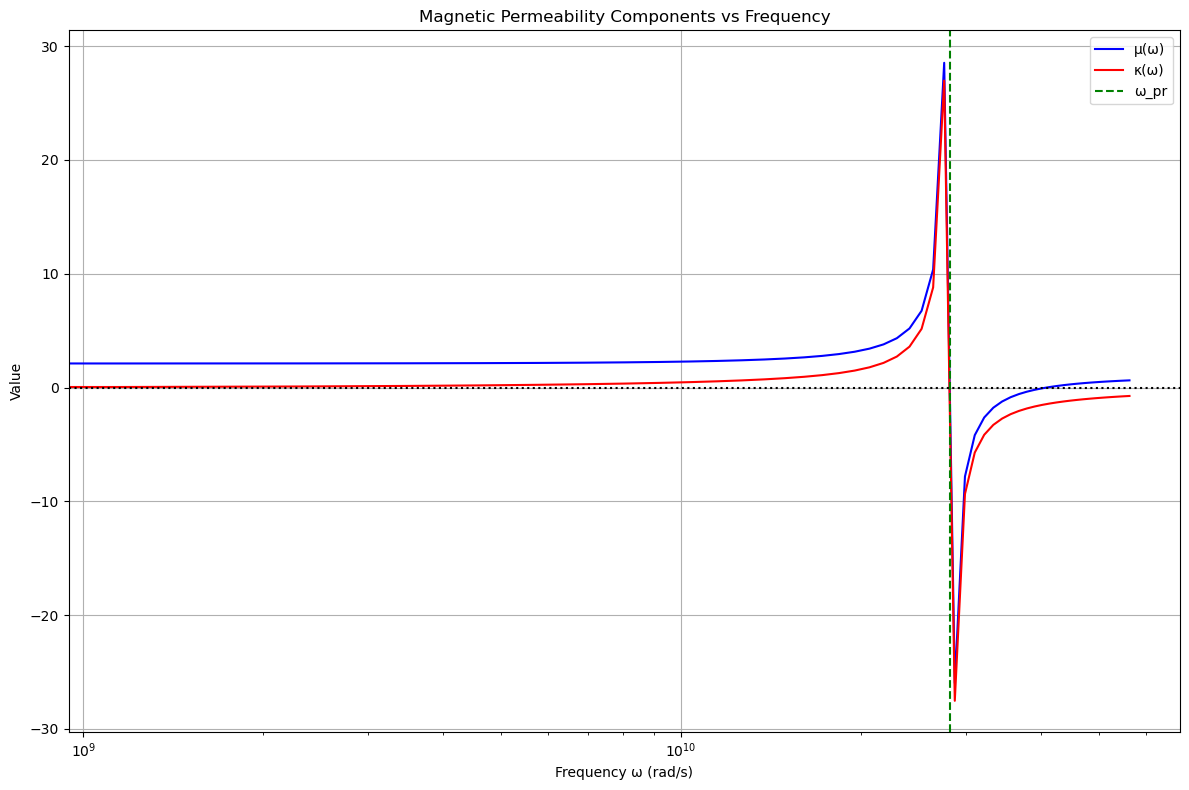

Precession frequency (ω_pr): 2.813e+10 rad/s


In [4]:
import matplotlib.pyplot as plt

# Create frequency range for plotting
# Let's center around omega_pr with some margin
freq_min = 0  # Start from 0
freq_max = omega_pr * 2  # Go to double omega_pr
frequencies = np.linspace(freq_min, freq_max, 50)

# Calculate mu and k for each frequency
mu_values = []
k_values = []

for freq in frequencies:
    denominator = omega_pr**2 - freq**2
    mu_x = 1 + (omega_pr * omega_s) / denominator
    k_x = (freq * omega_s) / denominator
    mu_values.append(mu_x)
    k_values.append(k_x)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot mu(x) and k(x)
plt.semilogx(frequencies, mu_values, 'b-', label='μ(ω)')
plt.semilogx(frequencies, k_values, 'r-', label='κ(ω)')

# Add vertical line for omega_pr
plt.axvline(x=omega_pr, color='g', linestyle='--', label='ω_pr')

# Add horizontal line at y=0 for reference
plt.axhline(y=0, color='k', linestyle=':')

# Customize the plot
plt.grid(True)
plt.legend()
plt.title('Magnetic Permeability Components vs Frequency')
plt.xlabel('Frequency ω (rad/s)')
plt.ylabel('Value')

# Set reasonable y-axis limits based on the data
y_min = min(min(mu_values), min(k_values))
y_max = max(max(mu_values), max(k_values))
plt.ylim(y_min * 1.1, y_max * 1.1)

# Show the plot
plt.tight_layout()
plt.show()

# Print the precession frequency for reference
print(f"Precession frequency (ω_pr): {omega_pr:.3e} rad/s")

# Dispersion

-----------
Initializing structure...
time for choose_chunkdivision = 9.08375e-05 s
Working in 2D dimensions.
Computational cell is 1 x 7 x 0 with resolution 32
     cylinder, center = (0,-3,0)
          radius 0.11, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (15,15,15)
     cylinder, center = (0,-2,0)
          radius 0.11, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (15,15,15)
     cylinder, center = (0,-1,0)
          radius 0.11, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (15,15,15)
     cylinder, center = (0,0,0)
          radius 0.11, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (15,15,15)
     cylinder, center = (0,1,0)
          radius 0.11, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (15,15,15)
     cylinder, center = (0,2,0)
          radius 0.11, height 1e+20, axis (0, 0, 1)
          dielectric constant ep

FloatProgress(value=0.0, description='0% done ', max=105.0)

harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 0.3001657928330047, 0.00015283776382546928, -981.9752177733194, 0.023125430525255994, 0.0009520450159253336+0.02310582496398026i, 1.3936404656513017e-05+0.0i
harminv0:, 0.7581833500373827, 6.783628018135668e-05, -5588.332290703587, 0.10230710933608628, -0.08305083760952692+0.059743643955335546i, 1.6730994779685113e-06+0.0i
harminv0:, 0.8272488277935817, -0.0028974063618484925, 142.75678390962943, 0.19078500584614597, -0.1727819429750205-0.0809031435575325i, 5.504735461433829e-06+0.0i
harminv0:, 0.9160467759177727, 0.0003141632123398942, -1457.9154081966458, 0.024685677901991387, 0.015963607613667365+0.018829389938012524i, 1.1372161537445352e-05+0.0i
harminv0:, 1.2601498629939802, -0.0006078824910949536, 1036.5077802488804, 0.035713564729257845, -0.01624703171361736+0.031803972490360405i, 1.1526804442303509e-05+0.0i
harminv0:, 1.2837141898763205, 0.0010866674548426886, -590.6656098678125, 0.012160775257466708, -0.0

FloatProgress(value=0.0, description='0% done ', max=105.0)

harminv1:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv1:, 0.22160772163069412, -7.15048382542277e-05, 1549.5994889380206, 0.033580954247127426, 0.03194949614201385-0.010339738121398788i, 1.7859852478894678e-05+0.0i
harminv1:, 0.3004396024499284, 5.5924768239448895e-06, -26861.050292024334, 0.05109555818342544, 0.0006391356777713102-0.05109156066965673i, 8.676443690371386e-06+0.0i
harminv1:, 0.8087700294315372, 0.004601915131601677, -87.8732012980483, 0.02361770003570593, 0.016071728550278996+0.017305932404315313i, 7.3128478657619e-06+0.0i
harminv1:, 0.827363287533285, -0.0023310989804073514, 177.4620671381157, 0.35622281945487494, -0.35152728996568744-0.05764773638019034i, 9.426123171424748e-07+0.0i
harminv1:, 0.916179332859893, 0.00043313950858446645, -1057.603052483065, 0.047963543694967095, 0.030593437342659926+0.03693972272960043i, 1.7722436594476233e-06+0.0i
harminv1:, 1.252683575226072, 0.0003601273142172017, -1739.2232215834476, 0.031712741978235814, -0.0201233090

FloatProgress(value=0.0, description='0% done ', max=105.0)

harminv2:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv2:, 0.22361363826590192, 0.00020682978073673344, -540.5740833582666, 0.0312429857793134, 0.028535915036732185-0.012721073595525706i, 5.720036911621101e-05+0.0i
harminv2:, 0.3013595073032827, -0.0002231827783692892, 675.140594415933, 0.054973518043916925, -0.002187076234119263-0.054929995300118224i, 3.1674680933846576e-05+0.0i
harminv2:, 0.7726777735965528, 0.000351302886988926, -1099.7316022923967, 0.12398841058868937, -0.11673978203541048-0.04177258970466485i, 2.0801905795866006e-06+0.0i
harminv2:, 0.8045098877912156, 0.004702473700356832, -85.541136331094, 0.018775954600874157, 0.018219071377217587-0.004538932619673736i, 8.480574481252339e-06+0.0i
harminv2:, 0.9666990958420336, 0.0005099462467264067, -947.8441130293103, 0.08310367543161254, 0.06679336385713606+0.04944560056153663i, 5.056852798734236e-06+0.0i
harminv2:, 1.2428159323764805, -0.006908571257565823, 89.94739187320593, 0.6920190910632575, -0.6911676513007

FloatProgress(value=0.0, description='0% done ', max=105.0)

harminv3:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv3:, 0.05559320863712468, -0.00023326463530780816, 119.16338832023497, 0.0013178607624794838, -0.001031799207150367+0.0008198459522415661i, 0.005085896137241033+0.0i
harminv3:, 0.3013219817068759, 0.0009488287995211334, -158.7862751736408, 0.03756898158941947, -0.020702374633693118-0.03135028009751044i, 0.0007026827319208207+0.0i
harminv3:, 0.7983793602475268, 0.003855949438897813, -103.52565209928375, 0.02347278090876189, 0.002942538431086715-0.023287612826829514i, 6.998223972981332e-05+0.0i
harminv3:, 0.8367183322595783, 0.0054554531442556065, -76.68641908698383, 0.06394801511209408, -0.0638875179404938-0.0027809509488115865i, 1.1411133070786381e-05+0.0i
harminv3:, 0.848647335446293, 0.00839621026971704, -50.537522774241644, 0.0015737607080911974, 0.00023993663631696158-0.001555362715537636i, 5.844428842722424e-05+0.0i
harminv3:, 0.9167723470848997, 0.000211707520599301, -2165.1860654021725, 0.05391052685458707, 0.03

FloatProgress(value=0.0, description='0% done ', max=105.0)

harminv4:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv4:, 0.13914950689366926, 0.0001102704115141836, -630.9467108308155, 0.015971123929111274, 0.00809119709691679+0.013769870337003033i, 0.0001793059313425034+0.0i
harminv4:, 0.2319315973333185, -0.0009619503741895078, 120.55278710647246, 0.047551506593034136, 0.0376222318240969-0.029081152863001825i, 0.00018972644978732434+0.0i
harminv4:, 0.3049485397325383, -0.0005891054764108873, 258.82337878645336, 0.06178826184869004, -0.014994679756429086-0.05994121187700847i, 0.0001695737165900554+0.0i
harminv4:, 0.7442534173716058, -7.678952540698517e-05, 4846.060796879887, 0.24087345395563878, -0.1684526585204391-0.1721735248460563i, 6.164123675565146e-07+0.0i
harminv4:, 0.7622597202068536, -0.00010992998580778292, 3467.02364512125, 0.17260748065834286, -0.15557970428821688-0.0747549195224715i, 6.366846266411295e-07+0.0i
harminv4:, 1.2182005014579569, 0.0010795081433232947, -564.2386808253683, 0.03457009799535093, -0.033384334774

FloatProgress(value=0.0, description='0% done ', max=105.0)

harminv5:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv5:, 0.10037722170804332, -0.00025985265352561907, 193.14257589089243, 0.0057081564072676335, -0.00011558519263533273+0.005706986037574824i, 0.00010818521142595885+0.0i
harminv5:, 0.15080126839116423, 6.978779698855585e-05, -1080.4272014482228, 0.018200432413971308, 0.012853015859196213+0.012886261031765113i, 4.138641132184648e-06+0.0i
harminv5:, 0.2386610046251421, 9.049086998040965e-05, -1318.7021225279952, 0.035064960224634394, 0.029834290156214072-0.01842461848804528i, 4.016953702943092e-05+0.0i
harminv5:, 0.3082462090572991, -4.616060210280472e-05, 3338.8451949868527, 0.051938398779774395, -0.008155657614477925-0.05129407876823872i, 9.387081535868774e-06+0.0i
harminv5:, 0.7380985304028278, 5.063208931419149e-05, -7288.841329681696, 0.24208824420604869, -0.15634992975034526-0.18482807538312346i, 5.889222517805944e-07+0.0i
harminv5:, 0.8503172923705149, -0.003411497241448423, 124.6252352250906, 0.2478785117437164, -

FloatProgress(value=0.0, description='0% done ', max=105.0)

harminv6:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv6:, 0.16643766884232433, 0.00032046698092939684, -259.67990268394107, 0.018110124282939833, 0.004098589335893309+0.01764024282710498i, 0.0005806674149059881+0.0i
harminv6:, 0.24395919159164178, -0.00028148862725199686, 433.33756317842705, 0.003610406562366458, -0.0012021759130780522-0.00340438079826475i, 0.00021393938811499437+0.0i
harminv6:, 0.543714562768967, -0.0010602616287842404, 256.4058473909042, 0.04796984017698888, 0.0368579790911334+0.030701709136844973i, 3.2223737222490906e-05+0.0i
harminv6:, 0.7485617501416669, -0.0002231318801624417, 1677.3975767082416, 0.1533316785122663, -0.14192746618682986-0.05802756221982155i, 8.270009610658105e-06+0.0i
harminv6:, 0.8397279623629252, 0.006664072890422355, -63.00410996177632, 0.006172981043857814, 0.005654194657576543+0.0024770502098384667i, 8.541231909585258e-06+0.0i
harminv6:, 1.0975193270367192, -0.002186971787884349, 250.9221502346051, 0.10191750758296643, 0.04706

FloatProgress(value=0.0, description='0% done ', max=105.0)

harminv7:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv7:, 0.17315010478155313, -0.000805511205117277, 107.478396130035, 0.024952796954444363, 0.008376259604649026-0.02350490057169468i, 0.0002095166620601387+0.0i
harminv7:, 0.2533183483597139, 0.0002979127339923661, -425.1552878672939, 0.035326010844089435, 0.02171554115197547-0.027863278964141754i, 3.739674350548356e-05+0.0i
harminv7:, 0.5194353137632034, 0.0033734948846810974, -76.98771326465292, 0.0007524501851974236, 0.0007079846074521022-0.00025483146747317076i, 0.00017767804090745328+0.0i
harminv7:, 0.7410234308907442, 0.0010700160649473437, -346.26743240869496, 0.1398043138256108, -0.13956371531913084-0.008198507825846803i, 1.7466749824774596e-06+0.0i
harminv7:, 0.7969542867981296, 0.0022901467358822534, -173.9963370711947, 0.045888437184686486, -0.04548200379531396+0.006093931244768346i, 2.9013142209971945e-06+0.0i
harminv7:, 1.1747257608795436, -0.002834841970034499, 207.19422339885273, 0.290845808845631, 0.12025

FloatProgress(value=0.0, description='0% done ', max=105.0)

harminv8:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv8:, 0.15771001755836123, -0.0005689707775135142, 138.5923704619569, 0.011931437983001284, 0.010956441639214679+0.004723938923048066i, 1.0047519598430922e-05+0.0i
harminv8:, 0.19240378159808938, 0.0001234297671748144, -779.4059164252761, 0.025130642769860306, 0.025072218845779575+0.0017126144270288965i, 1.1180330913404096e-06+0.0i
harminv8:, 0.736377707902436, 0.001571527967991045, -234.28717875246622, 0.011822570467821094, -0.0003555065746015413-0.011817224189377577i, 0.006155775328694583+0.0i
harminv8:, 0.767012024415281, -0.0004869125438462841, 787.6281214244328, 0.16792560123213307, -0.16621562351230346+0.023903431753402437i, 0.0006625751575592792+0.0i
harminv8:, 1.1753252877866263, 0.007557217573989162, -77.76177384596707, 0.00439964865223352, 0.002993748893769054-0.003224030989949816i, 0.0002467746036368832+0.0i
harminv8:, 1.2570323709382867, -0.003587949225004569, 175.17421402983845, 0.07142705025871027, 0.01478

FloatProgress(value=0.0, description='0% done ', max=105.0)

harminv9:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv9:, 0.20799447995545783, 0.0005981660422014291, -173.86015360381896, 0.0030368154846462537, -0.003035215703049656+9.855923979030074e-05i, 9.140094349246783e-05+0.0i
harminv9:, 0.32367082185155543, 0.001081154044877994, -149.68765246033047, 0.03579519441679867, -0.016714641798201504-0.031653067669567665i, 1.4485810961969594e-05+0.0i
harminv9:, 0.41152814282538136, -0.0034262739909653693, 60.05476268251263, 0.00018185713452557496, 0.00018153081481349554+1.0889474321630484e-05i, 0.0010353836220012489+0.0i
harminv9:, 0.7121120228602175, 8.205013380318933e-05, -4339.493367362049, 0.27636536504492193, -0.05424517400291506-0.27098943908168527i, 2.4539212410246438e-06+0.0i
harminv9:, 0.7317806809339483, -0.0037268514956435876, 98.17679639091409, 0.6331499858326934, -0.06328093940310152-0.6299797038541805i, 3.805228831798018e-05+0.0i
harminv9:, 0.7629899725973521, -7.533979075323328e-05, 5063.658691968212, 0.14561204469652514,

FloatProgress(value=0.0, description='0% done ', max=105.0)

harminv10:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv10:, 0.22288217776248284, -0.00024981768105059406, 446.0896779306503, 0.003862266209304822, -0.0037699962385781827-0.0008391833128966475i, 5.021063808819911e-05+0.0i
harminv10:, 0.27046440021438517, -0.0012895016985476967, 104.87167272404376, 0.031214551609240027, -0.010131307878909236+0.029524647886616035i, 0.0007625187956097018+0.0i
harminv10:, 0.7058476808545519, 0.0002768757728610035, -1274.664940093729, 0.2670115983878648, -0.017083559489011958-0.26646452985121266i, 3.0872867660097745e-07+0.0i
harminv10:, 0.7389729525467528, 0.003565983178693021, -103.61419495220333, 0.004951979885971351, 0.003779383516551078+0.0031997445250967842i, 4.176443197759753e-05+0.0i
harminv10:, 0.8259595193286942, 0.0007041397965063643, -586.5025123041946, 0.006634881174764296, 0.0009435627233606544-0.006567445286435653i, 0.00013532254607891774+0.0i
harminv10:, 0.9900428006188414, -0.005098588314150173, 97.08989426261027, 0.07615958544

FloatProgress(value=0.0, description='0% done ', max=105.0)

harminv11:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv11:, 0.2376446847563475, 0.0007856891014757302, -151.23328318414272, 0.0025669659322542153, -0.002303487454688376-0.0011328105064162411i, 7.959180718950747e-05+0.0i
harminv11:, 0.28768819912775934, 0.0017515512565229635, -82.12383110582057, 0.02491624688687673, -0.008926049889895413-0.023262523343156316i, 0.00017017569669954054+0.0i
harminv11:, 0.6999654275274078, -0.001001645974874331, 349.40759763709286, 0.4051600345231491, 0.04793356710625376-0.4023145867592544i, 2.6203595216792463e-05+0.0i
harminv11:, 0.7190093111322433, 8.018583134555525e-06, -44833.93755897615, 0.18207344050148155, -0.06024173611368105-0.17181871541265858i, 2.2227311859616635e-07+0.0i
harminv11:, 0.743606686801495, 0.00607700119435128, -61.18204218000611, 0.014421839067808973, -0.009556794351705925+0.010800792740210455i, 0.00010482244390112286+0.0i
harminv11:, 0.9664695502617491, 0.0021947411809611172, -220.17847904929602, 8.661081570402402e-05

FloatProgress(value=0.0, description='0% done ', max=105.0)

harminv12:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv12:, 0.25018271131520586, -0.000204799102828665, 610.800310791666, 0.03711838607308849, 0.010278619517401767-0.03566685527891879i, 9.164128186598387e-05+0.0i
harminv12:, 0.302602444263156, -0.0008252805535585828, 183.33307561794842, 0.0486592566218294, 0.04708111799734414-0.012291931626445296i, 0.00013213900958851716+0.0i
harminv12:, 0.5344061370983232, 0.0009638249719228185, -277.23194182870657, 0.060930389735367886, -0.02027550368837089+0.057457952830628094i, 6.691722554673488e-05+0.0i
harminv12:, 0.693736408248336, -2.1258111589509286e-05, 16316.981057496416, 0.302302937238911, 0.01972990184184133-0.3016584108500611i, 4.364757540146662e-07+0.0i
harminv12:, 0.7138018957448621, 5.808193510813489e-06, -61447.840401316775, 0.16723482640548332, -0.04159525299802977-0.16197938785815322i, 7.28370661061977e-08+0.0i
harminv12:, 0.7503489691000864, 0.0003424200109760687, -1095.655839390367, 0.09801146165720612, -0.045319580

FloatProgress(value=0.0, description='0% done ', max=105.0)

harminv13:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv13:, 0.2662324948700883, -0.0005068690992256099, 262.6245072710449, 0.043453983626914515, 0.030150674182387795-0.031291940486260175i, 3.9641019542000426e-05+0.0i
harminv13:, 0.3106113130169526, 7.52760466422143e-05, -2063.1484175389987, 0.038951380610184674, 0.03198422767906919-0.022231042063136287i, 0.00021578493076535317+0.0i
harminv13:, 0.5562285298179434, -0.00546319537426328, 50.90688614563337, 0.36398461247195857, -0.27188476418413005+0.24199891140437357i, 0.00025969958851693463+0.0i
harminv13:, 0.8982182585940782, -0.0035370673025069623, 126.97217521948895, 0.08826469570346514, -0.028600938520676196-0.0835023522025685i, 0.00010534591658031733+0.0i
harminv13:, 1.110367664981106, -0.0009424343952129374, 589.0954694677846, 0.1078222574579205, -0.03254192971893505-0.10279427033395384i, 4.494294781712837e-06+0.0i
harminv13:, 1.425231137718952, -0.002098071452349793, 339.65266915069196, 0.007290429119532935, -0.0056

FloatProgress(value=0.0, description='0% done ', max=105.0)

harminv14:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv14:, 0.2774598622116606, 0.0008077525759442124, -171.74805161551316, 0.02995732253073711, -0.000539735175912461-0.029952459984957696i, 3.0940804935547465e-06+0.0i
harminv14:, 0.5229233989779339, 0.003152555207939479, -82.93643798227383, 0.0399608115498893, 0.03835086900519847+0.011228415127339814i, 1.0174974847680552e-05+0.0i
harminv14:, 0.5886694789198631, 0.0033837932319227657, -86.98366575214241, 0.010830316338985343, 0.010807344912456825+0.0007050162733486738i, 1.2452297088445755e-05+0.0i
harminv14:, 0.6836195341413304, 4.345045105787734e-05, -7866.656357959645, 0.2876377581282549, 0.06438283401691383-0.28033967001656934i, 1.0812542140630102e-06+0.0i
harminv14:, 0.7050959286390672, 8.906388665259421e-05, -3958.371653986928, 0.12190134329431261, -0.014923740669340903-0.12098437693104062i, 2.818473122378085e-06+0.0i
harminv14:, 0.7414180473461204, -0.00026330898261088987, 1407.8859748620232, 0.08505901164347417, -0

FloatProgress(value=0.0, description='0% done ', max=105.0)

harminv15:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv15:, 0.2668177021455211, -0.0006615355660549303, 201.66542498741933, 0.013838683358124684, -0.008226125084620017+0.011128343236017767i, 0.0001247213971885968+0.0i
harminv15:, 0.28986900916647623, 0.0020813558353633896, -69.63465935075614, 0.019697155791267074, -0.0009601162982852109-0.019673741966367585i, 2.9720829598634076e-07+0.0i
harminv15:, 0.34959459925089914, -0.0003961683440143843, 441.21975485023336, 0.046527769033057054, -0.02712296237111338-0.03780447332537078i, 1.5338817491443927e-06+0.0i
harminv15:, 0.5077767558099403, 9.690630253714994e-06, -26199.366940828193, 0.06840833316864867, 0.009894124477249749+0.06768904156317716i, 8.431731536771149e-08+0.0i
harminv15:, 0.5211081620003803, 8.269280484481327e-07, -315086.76176743914, 0.13949608548221756, 0.04879143872377182+0.13068493934699044i, 5.643365978165567e-08+0.0i
harminv15:, 0.5576506607405516, -0.00021740896727895717, 1282.4923178652302, 0.1420396938143

FloatProgress(value=0.0, description='0% done ', max=105.0)

harminv16:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv16:, 0.3009272807627261, 0.0018853888160868131, -79.80509860754097, 0.018941940465257195, -0.0011939138496234525-0.01890427672007118i, 9.423873870041106e-05+0.0i
harminv16:, 0.3308627899149047, -0.003134995574040291, 52.769259493482856, 0.12142151080126926, 0.029463218382348434-0.11779262306195916i, 0.0001967641053262182+0.0i
harminv16:, 0.5379293924633917, 0.0022878465497769215, -117.562384705356, 0.002849111653469893, -0.002258457806485332-0.0017368953768904477i, 0.00021608174250358956+0.0i
harminv16:, 0.6785830768256333, -0.0023772792325707074, 142.72262751646494, 0.5385932327698711, 0.5097721350316871-0.1738247414228941i, 2.0945454665695423e-05+0.0i
harminv16:, 0.7843994718615785, 0.0031457203696243813, -124.67724077382644, 0.0022477209199825298, -0.00021376989894979456+0.002237532516954805i, 0.0012875946085944459+0.0i
harminv16:, 1.132433095706148, 4.440021455259487e-05, -12752.563327872089, 0.0665558136312862, 

FloatProgress(value=0.0, description='0% done ', max=105.0)

harminv17:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv17:, 0.3006323419535864, 0.002652857817345945, -56.66197788435462, 0.02583865134474414, 0.006077364027455221-0.025113772113982427i, 0.00021585006078252432+0.0i
harminv17:, 0.3357683680888112, -0.0008933543466367374, 187.92563631267802, 0.04590790793558244, 0.002310002331349271-0.045849753546241385i, 4.222158032011399e-05+0.0i
harminv17:, 0.49694716752113977, 0.0023480520307768813, -105.82115749724652, 0.038965143263827835, 0.01611654762118195+0.03547589720281648i, 0.00017363235763199203+0.0i
harminv17:, 0.5605027566806312, -3.0471889666619075e-05, 9197.046241845694, 0.17811971188104223, 0.14637452322782862+0.10149448610841555i, 4.695754911603729e-08+0.0i
harminv17:, 0.6734146611989064, 0.0003700658440138509, -909.8578970364281, 0.17522656380269977, 0.0674506438994581-0.16172433119246502i, 1.4377375672765595e-06+0.0i
harminv17:, 0.6942571686255492, -0.0009309933848256774, 372.8582715738332, 0.05428892270273, -0.043116

FloatProgress(value=0.0, description='0% done ', max=105.0)

harminv18:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv18:, 0.3375332807957571, 0.00048673072026001005, -346.7351317125082, 0.028813869563035624, -0.02126390748619937-0.019444416103704044i, 3.1916243969077055e-05+0.0i
harminv18:, 0.6721234095068924, -7.938080487734689e-05, 4233.5386403892335, 0.1285475426451372, 0.06800920057874413-0.10908354301517494i, 7.170416077482835e-06+0.0i
harminv18:, 0.9302300564066107, 0.004839025976513936, -96.11748944120716, 0.0029627453893757306, 0.002059148432781701-0.002130203740030473i, 9.021995919448638e-05+0.0i
harminv18:, 1.15532208024787, -0.0008861571369364756, 651.8720168761049, 0.03579524922595508, 0.02086414443731479-0.029085861583372497i, 0.0002199658895682576+0.0i
harminv18:, 1.191526298544593, 0.0015749534829344414, -378.2734891714231, 0.034307396678425445, -0.03393044801107923-0.005071702339282797i, 0.0001369211550776465+0.0i
harminv18:, 1.3291614964324485, 0.0015642618133795772, -424.8526317857252, 0.0068477476473532, 0.003068

FloatProgress(value=0.0, description='0% done ', max=105.0)

harminv19:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv19:, 0.3391621949496277, -2.721407493305786e-06, 62313.746799020504, 0.0011079451897014745, 0.000998091460705716-0.0004809947811036691i, 0.00021691592548853396+0.0i
harminv19:, 0.5617858982445536, -0.0032494892375072534, 86.44218478401709, 0.6314042378219088, 0.5443241810644969+0.31997265109369954i, 0.00013726626548441303+0.0i
harminv19:, 0.9676787041421984, -0.004624426338292658, 104.62689135399508, 0.048711739587547875, -0.02181644410104144+0.04355314386391886i, 5.168534595947401e-05+0.0i
harminv19:, 1.070830306808127, -0.003947442255699294, 135.63596848846473, 0.4715456245650099, 0.3029605512438569-0.361344960441437i, 4.3227077926989126e-05+0.0i
harminv19:, 1.4925554674739479, -0.0017082398662878395, 436.8694048563, 0.006454344482543223, 0.00505126396866761-0.004017871951441023i, 1.1865845610973088e-05+0.0i
run 19 finished at t = 105.0 (6720 timesteps)
freqs:, 20, 0.47500000000000003, 0.0, 0.0, 0.3391621949496277,

FloatProgress(value=0.0, description='0% done ', max=105.0)

harminv20:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv20:, 0.3407265524328765, 0.0025115869175637486, -67.83092992923034, 0.016889568301475037, -0.012676011639547551-0.011161372958746849i, 9.188364194656054e-05+0.0i
harminv20:, 0.5608320776485197, 0.004046939869024926, -69.29088345753543, 0.0653048044104191, 0.059396441807489715+0.027143695026517322i, 5.1515516269316133e-05+0.0i
harminv20:, 0.6377539689258658, -0.00012515829354633088, 2547.789486638307, 0.27496692122624455, 0.22305261777725816-0.1607928402365981i, 8.470381673980793e-06+0.0i
harminv20:, 0.8224731500742202, 0.00022704044535168041, -1811.2921440059463, 0.1038191697046371, -0.0946256766528785+0.042713011087315365i, 6.281547557410414e-06+0.0i
harminv20:, 1.06893487219443, 0.00020722664291010037, -2579.144402436125, 0.11166171925624081, 0.04297727538350205-0.1030596591682224i, 2.9963396803178148e-06+0.0i
harminv20:, 1.2061373850209127, 0.01040756629917489, -57.945217467244724, 0.0016197832869728457, 0.0009663

FileNotFoundError: [Errno 2] No such file or directory: 'output/dispersion/output-dispersion.png'

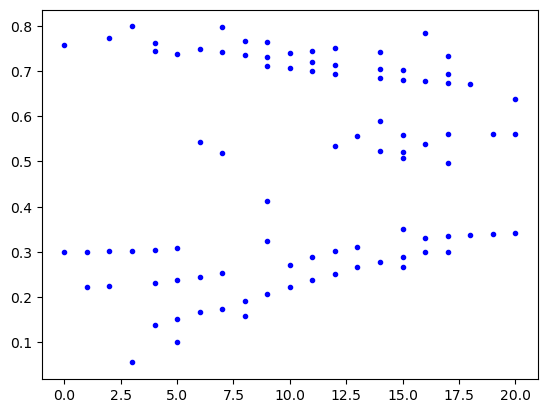

In [7]:
import meep as mp
from os import path
from io import BytesIO
from datetime import datetime

resolution = 32  # pixels/um

#GyrotropicSaturatedSusceptibility parameters
epsn = 15 #                             // constant
f0   = f*period    # natural frequency       // calculate from material_plot_script
gamma = 2.8e-5   # damping rate         // losses
sn   = f_sigma*period    # sigma parameter        // calculate from material_plot_script
alpha = 0.001 # alpha GSS               // constant

susc = [mp.GyrotropicSaturatedSusceptibility(
    frequency=f0, 
    gamma=gamma, 
    sigma=sn, 
    alpha = alpha,
    bias=mp.Vector3(0, 0, 1))
    ]

GSS_material = mp.Medium(epsilon=epsn, E_susceptibilities=susc)

w = 1.2  # width of waveguide
r = 0.11  # radius of holes
d = 1  # defect spacing (ordinary spacing = 1)
N = 3  # number of holes on either side of defect

# Cell
sy = 7  # size of cell in y direction (perpendicular to wvg.)
sx = 1
cell = mp.Vector3(sx, sy, 0)

geometry = []
for i in range(-N, N + 1):
    geometry.append(
            mp.Cylinder(
                r, 
                material=GSS_material, 
                center=(
                    0, 
                    i, 
                    0
                    )
                )
            )

# Source
fcen = 0.5  # pulse center frequency
df = 2     # pulse freq. width: large df = short impulse

src = [mp.Source(
    src=mp.GaussianSource(fcen, fwidth=df), 
    component=mp.Ez,
    center=mp.Vector3(0.25, 0)
)]

dpml = 1  # PML thickness
pml_layers = mp.PML(dpml, direction=mp.Y)

k_interp = 19
sim = mp.Simulation(cell_size=cell,
                    geometry=geometry,
                    sources=src,
                    resolution=resolution)

freqs_result_array = sim.run_k_points(100, mp.interpolate(k_interp, [mp.Vector3(0), mp.Vector3(0.5)]))

plt.figure()

for i in range(len(freqs_result_array)):
    for ii in range(len(freqs_result_array[i])):
        if (np.real(freqs_result_array[i][ii]) > 0.8):
            continue
        plt.scatter(i, np.real(freqs_result_array[i][ii]), color='b',marker='.')

fig_electric = plt.gcf()

now = datetime.now() # current date and time
date_time = now.strftime("%m/%d/%Y-%H:%M:%S")

file = open('output/dispersion/output-dispersion.png', 'wb+')
buffer = BytesIO()
fig_electric.savefig(buffer, format='png')
buffer.seek(0)
file.write(buffer.read())
buffer.close()
file.close()